###**Welcome**###

##**Part 0: Running classification models from tutorial 6 on your own dataset (*Not connected to parts 1 and 2)**##

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving titanic2.csv to titanic2.csv


In [ ]:
import pandas as pd
import os
import numpy as np

dfa = pd.read_csv('titanic2.csv')

dfa.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dups = dfa.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

print('Number of rows before discarding duplicates = %d' % (dfa.shape[0]))
dfa = dfa.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (dfa.shape[0]))

Number of duplicate rows = 52
Number of rows before discarding duplicates = 942
Number of rows after discarding duplicates = 890


In [ ]:
print('Number of missing values:')
for col in dfa.columns:
    print('\t%s: %d' % (col,dfa[col].isna().sum()))
print('')

Number of missing values:
	PassengerId: 0
	Survived: 0
	Pclass: 0
	Name: 0
	Sex: 0
	Age: 177
	SibSp: 0
	Parch: 0
	Ticket: 0
	Fare: 0
	Cabin: 686
	Embarked: 2



In [ ]:
print("Before drop: {}".format(dfa.columns))
dfa = dfa.drop(['Cabin'], axis=1)
print("After drop: {}".format(dfa.columns))

Before drop: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
After drop: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [ ]:
print("Missing values before fill: \n{}".format(dfa[['Name','Sex','Age']][16:21]))
print('')

dfa_grouped_by_sex = dfa.groupby('Sex')
female_med = dfa_grouped_by_sex.get_group('female')['Age'].median()
male_med = dfa_grouped_by_sex.get_group('male')['Age'].median()

print('Median Age of Female Passengers: %d' %female_med)
print('Median Age of Male Passengers: %d' %male_med)
print('')

dfa['Age'].loc[dfa['Sex'] == 'female'] = dfa['Age'].loc[dfa['Sex'] == 'female'].fillna(value=female_med)
dfa['Age'].loc[dfa['Sex'] == 'male'] = dfa['Age'].loc[dfa['Sex'] == 'male'].fillna(value=male_med)

print("Missing values after fill: \n{}".format(dfa[['Name','Sex','Age']][16:21]))

Missing values before fill: 
                                                 Name     Sex   Age
17                               Rice, Master. Eugene    male   2.0
18                       Williams, Mr. Charles Eugene    male   NaN
19  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0
20                            Masselmani, Mrs. Fatima  female   NaN
21                               Fynney, Mr. Joseph J    male  35.0

Median Age of Female Passengers: 27
Median Age of Male Passengers: 29

Missing values after fill: 
                                                 Name     Sex   Age
17                               Rice, Master. Eugene    male   2.0
18                       Williams, Mr. Charles Eugene    male  29.0
19  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0
20                            Masselmani, Mrs. Fatima  female  27.0
21                               Fynney, Mr. Joseph J    male  35.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
print("Missing values before fill: \n{}".format(dfa[['Name','Embarked']][60:64]))
print('')

print('Most embarked port: %s' %dfa['Embarked'].mode()[0])
print('')
dfa['Embarked'] = dfa['Embarked'].fillna(dfa['Embarked'].mode()[0])

print("Missing values after fill: \n{}".format(dfa[['Name','Embarked']][60:64]))

Missing values before fill: 
                           Name Embarked
63        Sirayanian, Mr. Orsen        C
64          Icard, Miss. Amelie      NaN
65  Harris, Mr. Henry Birkhardt        S
66        Skoog, Master. Harald        S

Most embarked port: S

Missing values after fill: 
                           Name Embarked
63        Sirayanian, Mr. Orsen        C
64          Icard, Miss. Amelie        S
65  Harris, Mr. Henry Birkhardt        S
66        Skoog, Master. Harald        S


In [ ]:
dfa_sort = dfa.sort_values(by='Pclass',ascending=True)
dfa_sort

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
597,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,S
267,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S
778,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
652,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,S
263,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,S
...,...,...,...,...,...,...,...,...,...,...,...
396,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,C
397,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,S
399,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C
386,369,1,3,"Jermyn, Miss. Annie",female,27.0,0,0,14313,7.7500,Q


In [ ]:
dfa_split_1c = dfa_sort["Pclass"] == 1 #select first class
dfa_split_1c

597     True
267     True
778     True
652     True
263     True
       ...  
396    False
397    False
399    False
386    False
941    False
Name: Pclass, Length: 890, dtype: bool

In [ ]:
dfa_split_2c = dfa_sort["Pclass"] == 2 #select second class
dfa_split_2c

597    False
267    False
778    False
652    False
263    False
       ...  
396    False
397    False
399    False
386    False
941    False
Name: Pclass, Length: 890, dtype: bool

In [ ]:
dfa_split_3c = dfa_sort["Pclass"] == 3 #select third class
dfa_split_3c

597    False
267    False
778    False
652    False
263    False
       ...  
396     True
397     True
399     True
386     True
941     True
Name: Pclass, Length: 890, dtype: bool

In [ ]:
dfa_1c = dfa[dfa_split_1c]
dfa_1c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
24,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
920,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
921,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
929,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
938,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [ ]:
from scipy.stats import zscore

dfa_1c['Fare_z_score'] = zscore(dfa_1c['Fare'])
dfa_1c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.167847
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.400128
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,-0.415937
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,-0.739290
24,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S,-0.624958
...,...,...,...,...,...,...,...,...,...,...,...,...
920,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,-0.407101
921,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S,-1.014578
929,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,-0.016151
938,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,-0.695218


In [ ]:
z_score_1c = dfa_1c['Fare_z_score'] <= 1.5
z_score_1c

1      True
3      True
6      True
11     True
24     True
       ... 
920    True
921    True
929    True
938    True
940    True
Name: Fare_z_score, Length: 215, dtype: bool

In [ ]:
dfa_1c_outlied = dfa_1c[z_score_1c]
dfa_1c_outlied

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.167847
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.400128
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,-0.415937
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,-0.739290
24,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S,-0.624958
...,...,...,...,...,...,...,...,...,...,...,...,...
920,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,-0.407101
921,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S,-1.014578
929,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,-0.016151
938,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,-0.695218


In [ ]:
print('Number of rows before discarding outliers = %d' % (dfa_1c.shape[0]))
print('Number of rows after discarding outliers = %d' % (dfa_1c_outlied.shape[0]))

Number of rows before discarding outliers = 215
Number of rows after discarding outliers = 195


Number of rows before discarding outliers = 184
Number of rows after discarding outliers = 174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


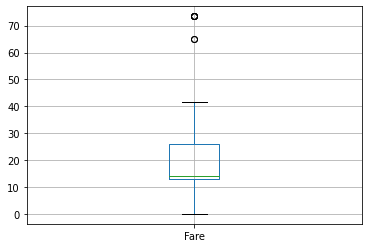

In [ ]:
dfa_2c = dfa[dfa_split_2c]
dfa_2c

%matplotlib inline

boxplot = dfa_2c.boxplot(column=['Fare'])  

dfa_2c['Fare_z_score'] = zscore(dfa_2c['Fare'])
dfa_2c

z_score_2c = dfa_2c['Fare_z_score'] <= 1.5
z_score_2c

dfa_2c_outlied = dfa_2c[z_score_2c]
dfa_2c_outlied

print('Number of rows before discarding outliers = %d' % (dfa_2c.shape[0]))

print('Number of rows after discarding outliers = %d' % (dfa_2c_outlied.shape[0]))

Number of rows before discarding outliers = 457
Number of rows after discarding outliers = 457


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


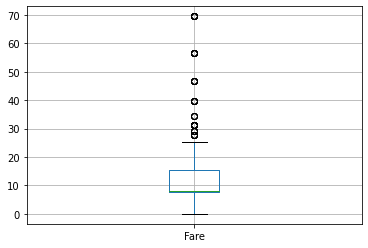

In [ ]:
dfa_3c = dfa[dfa_split_3c]
dfa_3c

%matplotlib inline

boxplot = dfa_3c.boxplot(column=['Fare'])  

dfa_3c['Fare_z_score'] = zscore(dfa_3c['Fare'])
dfa_3c

z_score_3c = dfa_3c['Fare_z_score'] <= 1.5
z_score_3c

dfa_3c_outlied = dfa_3c[z_score_3c]
dfa_3c_outlied

print('Number of rows before discarding outliers = %d' % (dfa_3c_outlied.shape[0]))
print('Number of rows after discarding outliers = %d' % (dfa_3c_outlied.shape[0]))

In [ ]:
dfa_all_class_data = [dfa_1c_outlied, dfa_2c_outlied, dfa_3c_outlied]
dfa_concat = pd.concat(dfa_all_class_data)
dfa_concat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.167847
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.400128
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,-0.415937
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,-0.739290
24,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S,-0.624958
...,...,...,...,...,...,...,...,...,...,...,...,...
932,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S,-0.268469
935,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,-0.563103
936,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,1.313043
939,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,0.830727


In [ ]:
reduced_data = dfa_concat[['PassengerId', 'Age', 'Sex', 'Survived', 'Pclass', 'Embarked']]
reduced_data

,PassengerId,Age,Sex,Survived,Pclass,Embarked
1,2,38.0,female,1,1,C
3,4,35.0,female,1,1,S
6,7,54.0,male,0,1,S
11,12,58.0,female,1,1,S
24,24,28.0,male,1,1,S
...,...,...,...,...,...,...
932,883,22.0,female,0,3,S
935,885,25.0,male,0,3,S
936,886,39.0,female,0,3,Q
939,889,27.0,female,0,3,S


In [ ]:
passenger_age_survival = reduced_data.groupby(["Sex","Embarked","Pclass"]).agg({'PassengerId' : 'count' , 'Age':['min','max','mean'], 'Survived': ['count', 'mean']})
passenger_age_survival

PassengerId    Age                  Survived          
                             count    min   max       mean    count      mean
Sex    Embarked Pclass                                                       
female C        1               36  16.00  60.0  35.638889       36  0.972222
                2                5  14.00  28.0  21.800000        5  1.000000
                3               23   0.75  45.0  18.000000       23  0.652174
       Q        1                1  33.00  33.0  33.000000        1  1.000000
                2                2  27.00  30.0  28.500000        2  1.000000
                3               33  15.00  39.0  25.742424       33  0.727273
       S        1               45   2.00  63.0  33.622222       45  0.955556
                2               65   2.00  57.0  29.484615       65  0.907692
                3               77   1.00  63.0  23.207792       77  0.402597
male   C        1               37  17.00  71.0  39.648649       37  0.405405
                2                9   1.00  36.0  26.722222        9  0.222222
                3               43   0.42  45.5  26.684186       43  0.232558
       Q        1                1  44.00  44.0  44.000000        1  0.000000
                2                1  57.00  57.0  57.000000        1  0.000000
                3               39   2.00  70.5  28.692308       39  0.076923
       S        1               75   0.92  80.0  39.312267       75  0.373333
                2               92   0.67  70.0  31.150326       92  0.163043
                3              242   1.00  74.0  27.859504      242  0.115702

In [ ]:
young_pssngrs = reduced_data.loc[reduced_data["Age"] < 20].groupby(["Sex","Pclass"]).agg({"PassengerId": "count","Age": ["min", "max", "mean"], 'Survived': ['count', 'mean']})
young_pssngrs

PassengerId   Age                  Survived          
                    count   min   max       mean    count      mean
Sex    Pclass                                                      
female 1               11  2.00  19.0  15.727273       11  0.909091
       2               15  2.00  19.0  11.400000       15  1.000000
       3               42  0.75  19.0  10.642857       42  0.547619
male   1                6  0.92  19.0  11.653333        6  0.666667
       2               18  0.67  19.0  10.129444       18  0.555556
       3               51  0.42  19.0  13.674902       51  0.215686

In [ ]:
dfa_concat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.167847
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.400128
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,-0.415937
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,-0.739290
24,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S,-0.624958


In [ ]:
dfa_concat = dfa_concat.sort_values(by='PassengerId',ascending=True)
dfa_concat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.546105
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.167847
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.488737
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.400128
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.478113
...,...,...,...,...,...,...,...,...,...,...,...,...
937,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,-0.572621
938,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,-0.695218
939,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,0.830727
940,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,-0.695218


In [ ]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low


In [ ]:
dfa_concat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.546105
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.167847
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.488737
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.400128
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.478113


In [ ]:
dfc = dfa_concat
dfc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.546105
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,-0.167847
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.488737
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,-0.400128
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.478113


In [ ]:
import os
import pandas as pd
import numpy as np

#path = ""

#filename_read = os.path.join(path,"preprocessed_titanic.csv")
#passenger_age_survival = pd.read_csv(filename_read,na_values=['NA','?'])

print("Before drop: {}".format(dfa_concat.columns))
dfa_concat.drop('PassengerId', axis=1, inplace=True)
dfa_concat.drop('Name', axis=1, inplace=True)
dfa_concat.drop('Ticket', axis=1, inplace=True)
#dfa_concat.drop('Cabin', axis=1, inplace=True)
dfa_concat.drop('SibSp', axis=1, inplace=True)
dfa_concat.drop('Parch', axis=1, inplace=True)
dfa_concat.drop('Fare', axis=1, inplace=True)
dfa_concat.drop('Fare_z_score', axis=1, inplace=True)
dfa_concat.drop('Embarked', axis=1, inplace=True)

print("After drop: {}".format(dfa_concat.columns))
dfa_concat[0:5]

Before drop: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Fare_z_score'],
      dtype='object')
After drop: Index(['Survived', 'Pclass', 'Sex', 'Age'], dtype='object')


,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [ ]:
encode_text_index(dfa_concat,"Sex")   # label encoding
dfa_concat

#dfa_concat

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0
...,...,...,...,...
937,0,2,1,27.0
938,1,1,0,19.0
939,0,3,0,27.0
940,1,1,1,26.0


In [ ]:
x,y = to_xy(dfa_concat,'Survived')

In [ ]:
x

array([[ 3.,  1., 22.],
       [ 1.,  0., 38.],
       [ 3.,  0., 26.],
       ...,
       [ 3.,  0., 27.],
       [ 1.,  1., 26.],
       [ 3.,  1., 32.]], dtype=float32)

In [ ]:
y

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

###**ML Model**###

In [ ]:
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing

model = Sequential()
model.add(Dense(12, input_dim = x.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(x,y,verbose=2, epochs=100)

Epoch 1/100
26/26 - 1s - loss: 0.6837 - 819ms/epoch - 31ms/step
Epoch 2/100
26/26 - 0s - loss: 0.6770 - 40ms/epoch - 2ms/step
Epoch 3/100
26/26 - 0s - loss: 0.6702 - 44ms/epoch - 2ms/step
Epoch 4/100
26/26 - 0s - loss: 0.6661 - 43ms/epoch - 2ms/step
Epoch 5/100
26/26 - 0s - loss: 0.6603 - 45ms/epoch - 2ms/step
Epoch 6/100
26/26 - 0s - loss: 0.6524 - 40ms/epoch - 2ms/step
Epoch 7/100
26/26 - 0s - loss: 0.6453 - 42ms/epoch - 2ms/step
Epoch 8/100
26/26 - 0s - loss: 0.6424 - 39ms/epoch - 2ms/step
Epoch 9/100
26/26 - 0s - loss: 0.6351 - 48ms/epoch - 2ms/step
Epoch 10/100
26/26 - 0s - loss: 0.6265 - 42ms/epoch - 2ms/step
Epoch 11/100
26/26 - 0s - loss: 0.6206 - 48ms/epoch - 2ms/step
Epoch 12/100
26/26 - 0s - loss: 0.6145 - 41ms/epoch - 2ms/step
Epoch 13/100
26/26 - 0s - loss: 0.6077 - 41ms/epoch - 2ms/step
Epoch 14/100
26/26 - 0s - loss: 0.6016 - 51ms/epoch - 2ms/step
Epoch 15/100
26/26 - 0s - loss: 0.5948 - 42ms/epoch - 2ms/step
Epoch 16/100
26/26 - 0s - loss: 0.5880 - 49ms/epoch - 2ms/step

In [ ]:
pred = model.predict(x_test)
print(pred[0])

6/6 [==============================] - 0s 2ms/step
[0.86082035 0.13917968]


In [ ]:
pred = np.argmax(pred, axis=1) 

In [ ]:
true = np.argmax(y_test, axis=1)

In [ ]:
print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 0.83


In [ ]:
print(classification_report(true,pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       104
           1       0.90      0.61      0.73        62

    accuracy                           0.83       166
   macro avg       0.86      0.79      0.80       166
weighted avg       0.84      0.83      0.82       166



###**Naïve Bayes**###

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

clf_NB = GaussianNB()
clf_NB.fit(x,y[:,0])
NB_pred = clf_NB.predict(x_test)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test[:,0], NB_pred)))

[1. 1. 1. ... 1. 1. 1.]
Accuracy on test data is 0.78


###**K Nearest Neighbor (KNN) Classifier**###

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 

Text(0, 0.5, 'Accuracy')

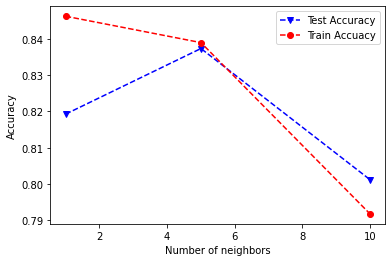

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x, y)
    knn_pred = clf.predict(x_test)
    knn_pred_train = clf.predict(x)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

###**Support Vector Machine (SVM) Classifier**###

[1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
[1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0

Text(0, 0.5, 'Accuracy')

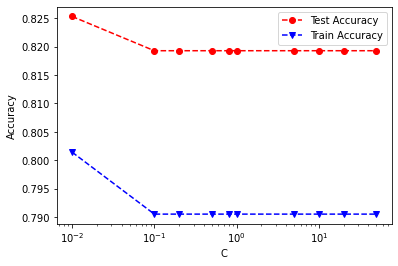

In [ ]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc = []
SVMLtrainAcc = []


for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(x,y[:,0])
    svml_pred = clf.predict(x_test)
    svml_pred_train = clf.predict(x)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test[:,0], svml_pred))
    SVMLtrainAcc.append(accuracy_score(y[:,0],svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

###**Decision Tree**###

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier()

#y = pd.DataFrame(data, columns=['Class'])
#x = data.drop(['Name','Class'],axis=1)

#clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
#clf = clf.fit(x, y)

In [ ]:
X = dfa_concat.iloc[:, 1:]
X
#X = dfa_concat.iloc[:, :4]

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
937,2,1,27.0
938,1,0,19.0
939,3,0,27.0
940,1,1,26.0


In [ ]:
Y = dfa_concat.iloc[:, 0]
Y

0      0
1      1
2      1
3      1
4      0
      ..
937    0
938    1
939    0
940    1
941    0
Name: Survived, Length: 826, dtype: int64

In [ ]:
regressor.fit(X,Y)

DecisionTreeClassifier()

In [ ]:
y_pred = regressor.predict(X)

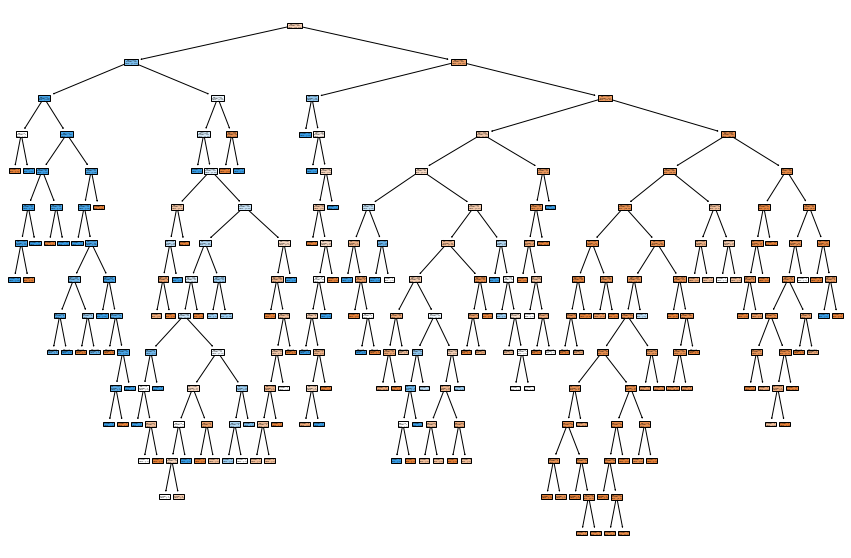

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regressor, feature_names = X.columns, filled = True)

###**Logistic Regression**###

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report
import pandas as pd

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_trainc)

LogisticRegression()

In [ ]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[1.21156436 2.55902248 0.03352849]]
[-4.76041198]


In [ ]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

In [ ]:
y_pred

array([1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
for i in range(6):
  print("Predicted: {}".format(y_pred[i]))
  print("Actual: {}".format(y[i]))
  #print("Actual: " + y_test[i])

Predicted: 1.0
Actual: [1. 0.]
Predicted: 0.0
Actual: [0. 1.]
Predicted: 1.0
Actual: [0. 1.]
Predicted: 0.0
Actual: [0. 1.]
Predicted: 0.0
Actual: [1. 0.]
Predicted: 1.0
Actual: [1. 0.]


In [ ]:
# Show the Confusion Matrix
confusion_matrix(y_test[:, 0], y_pred)

array([[ 68,  29],
       [ 21, 130]])

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1.]
[1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 

Text(0, 0.5, 'Accuracy')

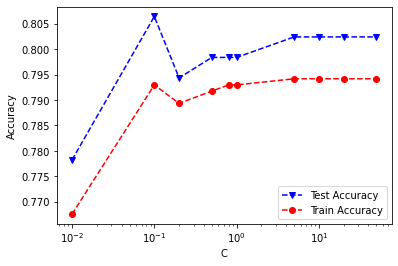

In [ ]:
from sklearn.linear_model import LogisticRegression

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(x,y[:,0])
    log_reg_pred = clf.predict(x_test)
    log_reg_pred_train = clf.predict(x)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test[:,0], log_reg_pred))
    LRtrainAcc.append(accuracy_score(y[:,0],log_reg_pred_train))
    
    

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

##**Part 1**##

###**Useful Features**###

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
import os
import numpy as np

df = pd.read_csv('Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
dff = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df.shape[0]))

Number of duplicate rows = 0
Number of rows before discarding duplicates = 10000
Number of rows after discarding duplicates = 10000


In [ ]:
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))
print('')

Number of missing values:
	RowNumber: 0
	CustomerId: 0
	Surname: 0
	CreditScore: 0
	Geography: 0
	Gender: 0
	Age: 0
	Tenure: 0
	Balance: 0
	NumOfProducts: 0
	HasCrCard: 0
	IsActiveMember: 0
	EstimatedSalary: 0
	Exited: 0



In [ ]:
df.drop('RowNumber', axis=1, inplace=True)

In [ ]:
df.drop('CustomerId', axis=1, inplace=True)

In [ ]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from scipy.stats import zscore

df['CreditScore_z_score'] = zscore(df['CreditScore'])
df['BalanceScore_z_score'] = zscore(df['Balance'])
df['SalaryScore_z_score'] = zscore(df['EstimatedSalary'])
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,-0.326221,-1.225848,0.021886
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,-0.440036,0.117350,0.216534
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,-1.536794,1.333053,0.240687
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.501521,-1.225848,-0.108918
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2.063884,0.785728,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1.246488,-1.225848,-0.066419
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,-1.391939,-0.306379,0.027988
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.604988,-1.225848,-1.008643
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1.256835,-0.022608,-0.125231


In [ ]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

In [ ]:
encode_text_index(df,"Gender")
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,-0.326221,-1.225848,0.021886
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,-0.440036,0.117350,0.216534
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,-1.536794,1.333053,0.240687
3,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,0.501521,-1.225848,-0.108918
4,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,2.063884,0.785728,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,1.246488,-1.225848,-0.066419
9996,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,-1.391939,-0.306379,0.027988
9997,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,0.604988,-1.225848,-1.008643
9998,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,1.256835,-0.022608,-0.125231


In [ ]:
encode_text_index(df,"Geography")
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score
0,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,-0.326221,-1.225848,0.021886
1,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,-0.440036,0.117350,0.216534
2,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,-1.536794,1.333053,0.240687
3,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.501521,-1.225848,-0.108918
4,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2.063884,0.785728,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0,1.246488,-1.225848,-0.066419
9996,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0,-1.391939,-0.306379,0.027988
9997,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1,0.604988,-1.225848,-1.008643
9998,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1.256835,-0.022608,-0.125231


In [ ]:
print("Before drop: {}".format(df.columns))
df = df.drop(['CreditScore'], axis=1)
df = df.drop(['Balance'], axis=1)
df = df.drop(['EstimatedSalary'], axis=1)
df = df.drop(['Surname'], axis=1)
print("After drop: {}".format(df.columns))

Before drop: Index(['Surname', 'Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'Exited', 'CreditScore_z_score',
       'BalanceScore_z_score', 'SalaryScore_z_score'],
      dtype='object')
After drop: Index(['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'CreditScore_z_score',
       'BalanceScore_z_score', 'SalaryScore_z_score'],
      dtype='object')


In [ ]:
x,y = to_xy(df,'Exited')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression

# Create linear regression
regressor = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=.1)

# Fit/train linear regression
regressor.fit(x_train,y_train[:,0])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(l1_ratio=0.1, penalty='elasticnet', solver='saga')

In [ ]:
# Simple function to evaluate the coefficients of a classification

def report_coef(names,coef):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    r['coef'].plot(kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))  

In [ ]:
names = list(df.columns.values)

,coef,positive
BalanceScore_z_score,-0.256144,False
Geography,-0.062689,False
Age,-0.056821,False
SalaryScore_z_score,-0.019994,False
Tenure,0.037851,True
CreditScore_z_score,0.064220,True
HasCrCard,0.176478,True
NumOfProducts,0.274774,True
Gender,0.631295,True
IsActiveMember,1.063442,True


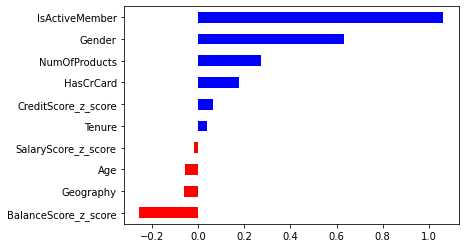

In [ ]:
# Create the plot for the importance of each feature

names.remove("Exited")

report_coef(
  names,
  regressor.coef_[0])

Based on our results above, using linear regression, the higher the absolute value of the regression score of a feature is, the more important it is. In this case, the longer the bar, the more important it is, regardless of whether it is positive or negative. IsActiveMember, Gender, Balance, and NumOfProducts are the most important features to consider when trying to predict if someone will exit or not. The rest are not as important. A company should look for the features mentioned above if they want to be profitable.

##**Part 2**##

###**Optimal training/test split**###

When it comes to finding a train-test split ratio that we think will be best for our ML models to be trained and tested on, there is one thing to keep in mind:

There is no optimal split percentage.

One has to come to a split percentage that suits the requirements and meets the model’s needs. We just need to keep in mind that if there is less training data, the machine learning model will show high variance in training. We also need to be aware of the fact that with less testing data, model performance statistics will have greater variance.

Since our dataset isn't too large or too small, we think the 80-20 split in the dataset is the best for our ML Model. 

##**Part 3: Running the classification models on the provided dataset and performing accuracy analysis**##

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
import pandas as pd
import os
import numpy as np

df = pd.read_csv('Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df.shape[0]))

Number of duplicate rows = 0
Number of rows before discarding duplicates = 10000
Number of rows after discarding duplicates = 10000


In [ ]:
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))
print('')

Number of missing values:
	RowNumber: 0
	CustomerId: 0
	Surname: 0
	CreditScore: 0
	Geography: 0
	Gender: 0
	Age: 0
	Tenure: 0
	Balance: 0
	NumOfProducts: 0
	HasCrCard: 0
	IsActiveMember: 0
	EstimatedSalary: 0
	Exited: 0



In [ ]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

from sklearn.model_selection import train_test_split

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import os
import pandas as pd
import numpy as np

#path = ""

#filename_read = os.path.join(path,"preprocessed_titanic.csv")
#passenger_age_survival = pd.read_csv(filename_read,na_values=['NA','?'])

print("Before drop: {}".format(df.columns))
df.drop('RowNumber', axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)

print("After drop: {}".format(df.columns))
df[0:5]

Before drop: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
After drop: Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
encode_text_index(df,"Geography")   # label encoding
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
encode_text_index(df,"Gender")   # label encoding
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dfc = df

In [ ]:
dfc.drop('CustomerId', axis=1, inplace=True)
dfc

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
x,y = to_xy(dfc,'Exited')

In [ ]:
import sklearn
#from sklearn import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

###**ML Model**###

In [ ]:
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing

In [ ]:
from scipy.stats import zscore

df['CreditScore_z_score'] = zscore(df['CreditScore'])
df['BalanceScore_z_score'] = zscore(df['Balance'])
df['SalaryScore_z_score'] = zscore(df['EstimatedSalary'])
df['Age_z_score'] = zscore(df['Age'])
df['Tenure_z_score'] = zscore(df['Tenure'])

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score,Age_z_score,Tenure_z_score
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,-0.326221,-1.225848,0.021886,0.293517,-1.041760
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,-0.440036,0.117350,0.216534,0.198164,-1.387538
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,-1.536794,1.333053,0.240687,0.293517,1.032908
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.501521,-1.225848,-0.108918,0.007457,-1.387538
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2.063884,0.785728,-0.365276,0.388871,-1.041760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1.246488,-1.225848,-0.066419,0.007457,-0.004426
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,-1.391939,-0.306379,0.027988,-0.373958,1.724464
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,0.604988,-1.225848,-1.008643,-0.278604,0.687130
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1.256835,-0.022608,-0.125231,0.293517,-0.695982


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df[['CreditScore_z_score', 'Age_z_score', 'Tenure_z_score','BalanceScore_z_score','SalaryScore_z_score']]
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test

,CreditScore_z_score,Age_z_score,Tenure_z_score,BalanceScore_z_score,SalaryScore_z_score
6252,-0.564197,-0.660018,-0.695982,0.324119,-1.013811
4684,-0.284834,0.388871,-1.387538,-1.225848,0.804921
1731,-0.512463,0.484225,-0.350204,-1.225848,-0.722147
4742,-1.495407,1.914528,1.032908,0.683816,1.227481
4521,-0.936681,-1.136786,0.687130,0.777477,0.253524
...,...,...,...,...,...
6412,-0.502117,1.342407,-0.004426,0.349118,-0.957298
8285,-0.429689,-1.327494,1.724464,-1.225848,0.170498
7853,0.822271,0.770285,0.687130,-1.225848,-1.160142
1095,0.429093,-0.946079,-0.350204,-1.225848,-0.405759


In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score,Age_z_score,Tenure_z_score
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,-0.326221,-1.225848,0.021886,0.293517,-1.041760
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,-0.440036,0.117350,0.216534,0.198164,-1.387538
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,-1.536794,1.333053,0.240687,0.293517,1.032908
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.501521,-1.225848,-0.108918,0.007457,-1.387538
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2.063884,0.785728,-0.365276,0.388871,-1.041760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0,1.246488,-1.225848,-0.066419,0.007457,-0.004426
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,-1.391939,-0.306379,0.027988,-0.373958,1.724464
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1,0.604988,-1.225848,-1.008643,-0.278604,0.687130
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1.256835,-0.022608,-0.125231,0.293517,-0.695982


In [ ]:
dfc = df
dfc.drop('EstimatedSalary', axis=1, inplace=True)
dfc.drop('Balance', axis=1, inplace=True)
dfc.drop('Age', axis=1, inplace=True)
dfc.drop('Tenure', axis=1, inplace=True)
dfc.drop('CreditScore', axis=1, inplace=True)
dfc

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score,Age_z_score,Tenure_z_score
0,0,0,1,1,1,1,-0.326221,-1.225848,0.021886,0.293517,-1.041760
1,2,0,1,0,1,0,-0.440036,0.117350,0.216534,0.198164,-1.387538
2,0,0,3,1,0,1,-1.536794,1.333053,0.240687,0.293517,1.032908
3,0,0,2,0,0,0,0.501521,-1.225848,-0.108918,0.007457,-1.387538
4,2,0,1,1,1,0,2.063884,0.785728,-0.365276,0.388871,-1.041760
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,2,1,0,0,1.246488,-1.225848,-0.066419,0.007457,-0.004426
9996,0,1,1,1,1,0,-1.391939,-0.306379,0.027988,-0.373958,1.724464
9997,0,0,1,0,1,1,0.604988,-1.225848,-1.008643,-0.278604,0.687130
9998,1,1,2,1,0,1,1.256835,-0.022608,-0.125231,0.293517,-0.695982


In [ ]:
x,y = to_xy(df,'Exited')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
print('Tensor Flow Version: {}'.format(tf.__version__))

Tensor Flow Version: 2.9.2


In [ ]:
import tensorflow.keras
print('Keras Version: {}'.format(tensorflow.keras.__version__))

Keras Version: 2.9.0


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(64, input_dim=x.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
model.add(Dense(32, activation='relu')) # Hidden 2
model.add(Dense(16, activation='relu')) # Hidden 2
model.add(Dense(8, activation='relu')) # Hidden 2
model.add(Dense(4, activation='relu')) # Hidden 2
model.add(Dense(2, activation='softmax')) # Output

#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2, verbose = 2, mode = 'auto')

#model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
model.fit(x_train,y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
250/250 - 4s - loss: 0.6358 - val_loss: 0.5836 - 4s/epoch - 16ms/step
Epoch 2/100
250/250 - 1s - loss: 0.5494 - val_loss: 0.5019 - 576ms/epoch - 2ms/step
Epoch 3/100
250/250 - 1s - loss: 0.4835 - val_loss: 0.4629 - 562ms/epoch - 2ms/step
Epoch 4/100
250/250 - 1s - loss: 0.4479 - val_loss: 0.4295 - 564ms/epoch - 2ms/step
Epoch 5/100
250/250 - 1s - loss: 0.4281 - val_loss: 0.4126 - 551ms/epoch - 2ms/step
Epoch 6/100
250/250 - 1s - loss: 0.4125 - val_loss: 0.4018 - 562ms/epoch - 2ms/step
Epoch 7/100
250/250 - 1s - loss: 0.3980 - val_loss: 0.3914 - 554ms/epoch - 2ms/step
Epoch 8/100
250/250 - 1s - loss: 0.3850 - val_loss: 0.3778 - 554ms/epoch - 2ms/step
Epoch 9/100
250/250 - 1s - loss: 0.3725 - val_loss: 0.3661 - 560ms/epoch - 2ms/step
Epoch 10/100
250/250 - 1s - loss: 0.3616 - val_loss: 0.3700 - 579ms/epoch - 2ms/step
Epoch 11/100
250/250 - 1s - loss: 0.3509 - val_loss: 0.3572 - 560ms/epoch - 2ms/step
Epoch 12/100
250/250 - 1s - loss: 0.3431 - val_loss: 0.3535 - 556ms/epoch - 

In [ ]:
pred = model.predict(x_test)
print("Shape: {}".format(pred.shape))
print(pred[0:5])

63/63 [==============================] - 0s 1ms/step
Shape: (2000, 2)
[[0.89215684 0.10784314]
 [0.9429161  0.05708391]
 [0.9229271  0.07707296]
 [0.73457867 0.2654213 ]
 [0.9009534  0.09904658]]


In [ ]:
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print('Final score (RMSE): {}'.format(score))

Final score (RMSE): 0.33488357067108154


In [ ]:
predict_classes = np.argmax(pred,axis=1)

true_classes = np.argmax(y_test,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

Predictions: [0 0 0 ... 1 0 0]
True: [0 0 0 ... 1 1 1]


In [ ]:
correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))

Accuracy: 0.8535


###**Naïve Bayes**###

In [ ]:
import pandas as pd
import os
import numpy as np

df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB 

X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
Y = df[['Exited']]
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
Y = df[['Exited']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

x_test[0:10]

,CreditScore,Age,Tenure,Balance,EstimatedSalary
4132,540,28,6,84121.04,80698.54
6553,638,50,1,102645.48,168359.98
7604,691,60,6,101070.69,177355.80
585,760,51,2,100946.71,179614.80
5924,738,39,1,94435.45,189430.86
9642,704,38,6,106687.76,173776.50
2846,544,39,4,142406.43,146637.45
9751,681,59,4,122781.51,140166.95
1891,584,37,1,0.00,180363.56
3367,581,40,0,101016.53,7926.35


In [ ]:
from sklearn.naive_bayes import GaussianNB 

clf_NB = GaussianNB() 
clf_NB.fit(x_train, y_train) 
NB_pred = clf_NB.predict(x_test) 

print("Naïve Bayes prediction: ",  NB_pred) 
print("\n")
print(classification_report(y_test, NB_pred))
print("\n")

print('Accuracy on the test data is %.2f' % (accuracy_score(y_test, NB_pred)))
print("\n")

Naïve Bayes prediction:  [0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1581
           1       0.42      0.09      0.15       419

    accuracy                           0.78      2000
   macro avg       0.61      0.53      0.51      2000
weighted avg       0.72      0.78      0.72      2000



Accuracy on the test data is 0.78




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###**K Nearest Neighbor (KNN) Classifier**###

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 0.]]


Text(0, 0.5, 'Accuracy')

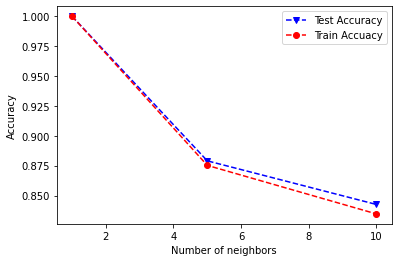

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []
#[:,0]
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x, y)
    knn_pred = clf.predict(x_test)
    knn_pred_train = clf.predict(x)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
for pred in y_pred[:,0]:
  if pred == 1:
    print(pred, "Exited")
  else:
    print(pred, "Not Exited")

1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
0.0 Not Exited
0.0 Not Exited
1.0 Exited
0.0 Not Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
0.0 Not Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
0.0 Not Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
0.0 Not Exited
1.0 Exited
1.0 Exited
0.0 Not Exited
1.

In [ ]:
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.845


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(y_test[:,0], y_pred[:,0])
print(confusion)

#plot_confusion_matrix(confusion, data.Class.unique(), title='Confusion matrix', cmap=plt.cm.Blues)

'''
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_pred)))
print('F1 score on test data is %.2f' % (f1_score(y_test, y_pred)))
print('Precision Score on test data is %.2f' % (precision_score(y_test, y_pred,pos_label='mammals')))
print('Recall score on test data is %.2f' % (recall_score(y_test, y_pred,pos_label='mammals')))
'''

print(classification_report(y_test, y_pred))

[[ 145  248]
 [  62 1545]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.70      0.37      0.48       393

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.83      0.84      0.83      2000
 samples avg       0.84      0.84      0.84      2000



In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.8055


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.694


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.835


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.7725


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.8385


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.8


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.845


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.8115


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.8435


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.825


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 30, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.827


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 100, metric = 'euclidean', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: ", knn.score(x_test, y_test))

Accuracy:  0.821


###**Support Vector Machine (SVM) Classifier**###

In [ ]:
dfs = dfc.head(100)
dfs.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score,Age_z_score,Tenure_z_score
0,0,0,1,1,1,1,-0.326221,-1.225848,0.021886,0.293517,-1.041760
1,2,0,1,0,1,0,-0.440036,0.117350,0.216534,0.198164,-1.387538
2,0,0,3,1,0,1,-1.536794,1.333053,0.240687,0.293517,1.032908
3,0,0,2,0,0,0,0.501521,-1.225848,-0.108918,0.007457,-1.387538
4,2,0,1,1,1,0,2.063884,0.785728,-0.365276,0.388871,-1.041760


In [ ]:
x,y = to_xy(dfs,'Exited')

In [ ]:
import sklearn
#from sklearn import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

model = SVC(C=10,kernel='linear')
model.fit(x_train,y_train[:,0])

SVC(C=10, kernel='linear')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy: ", model.score(x_test, y_test[:,0]))

Accuracy:  0.7


###**Decision Tree**###

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier()

In [ ]:
dfsc = dfc.head(100)
dfsc.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score,Age_z_score,Tenure_z_score
0,0,0,1,1,1,1,-0.326221,-1.225848,0.021886,0.293517,-1.041760
1,2,0,1,0,1,0,-0.440036,0.117350,0.216534,0.198164,-1.387538
2,0,0,3,1,0,1,-1.536794,1.333053,0.240687,0.293517,1.032908
3,0,0,2,0,0,0,0.501521,-1.225848,-0.108918,0.007457,-1.387538
4,2,0,1,1,1,0,2.063884,0.785728,-0.365276,0.388871,-1.041760


In [ ]:
x,y = to_xy(dfsc,'Exited')

In [ ]:
import sklearn
#from sklearn import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
regressor.fit(x_train,y_train[:,0])

DecisionTreeClassifier()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
regressor.fit(x,y)

DecisionTreeClassifier()

In [ ]:
score = regressor.score(x_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 1.0


In [ ]:
X = df.iloc[:, 1:]
X
#X = dfa_concat.iloc[:, :4]

,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore_z_score,BalanceScore_z_score,SalaryScore_z_score,Age_z_score,Tenure_z_score
0,0,1,1,1,1,-0.326221,-1.225848,0.021886,0.293517,-1.041760
1,0,1,0,1,0,-0.440036,0.117350,0.216534,0.198164,-1.387538
2,0,3,1,0,1,-1.536794,1.333053,0.240687,0.293517,1.032908
3,0,2,0,0,0,0.501521,-1.225848,-0.108918,0.007457,-1.387538
4,0,1,1,1,0,2.063884,0.785728,-0.365276,0.388871,-1.041760
...,...,...,...,...,...,...,...,...,...,...
9995,1,2,1,0,0,1.246488,-1.225848,-0.066419,0.007457,-0.004426
9996,1,1,1,1,0,-1.391939,-0.306379,0.027988,-0.373958,1.724464
9997,0,1,0,1,1,0.604988,-1.225848,-1.008643,-0.278604,0.687130
9998,1,2,1,0,1,1.256835,-0.022608,-0.125231,0.293517,-0.695982


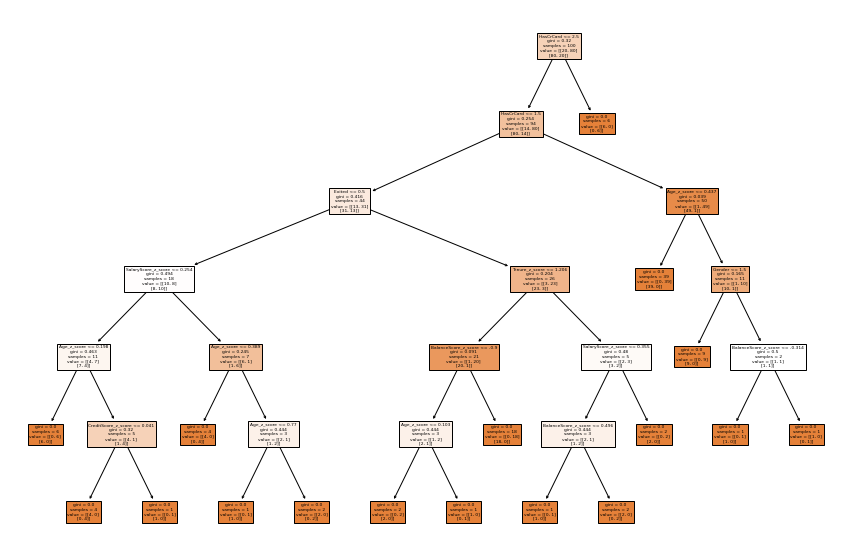

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regressor, feature_names = X.columns, filled = True)

###**Logistic Regression**###

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0, 0.5, 'Accuracy')

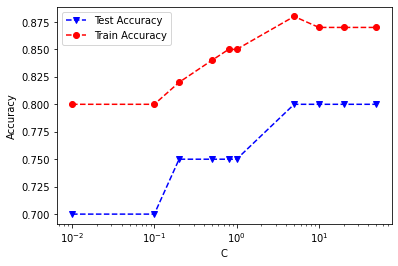

In [ ]:
from sklearn.linear_model import LogisticRegression

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(x,y[:,0])
    log_reg_pred = clf.predict(x_test)
    log_reg_pred_train = clf.predict(x)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test[:,0], log_reg_pred))
    LRtrainAcc.append(accuracy_score(y[:,0],log_reg_pred_train))
    
plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [ ]:
score = clf.score(x_test, y_test[:,0])
print('Test Accuracy Score', score)

Test Accuracy Score 0.8


In [ ]:
print("Accuracy: ", model.score(x_test, y_test[:,0]))

Accuracy:  0.7
